<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/1_Linear_Classification(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+ **TensorFlow:  is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.**
+ **Keras: is a deep learning API written in Python, running on top of the machine learning platform TensorFlow**

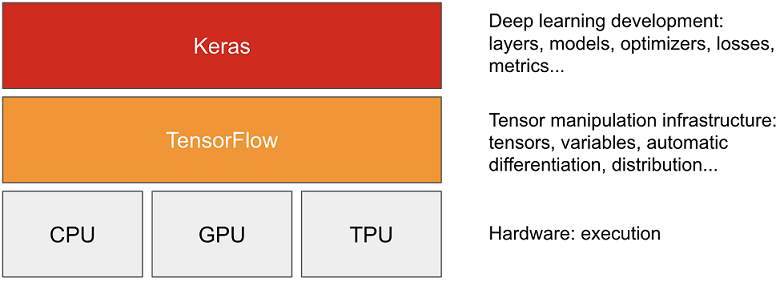

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
#Load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
df = load_breast_cancer()

In [ ]:
type(df)

sklearn.utils.Bunch

In [ ]:
print(df)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

+ There are two types of cancer:
> 1. Malignant
> 2. Benign 

In [ ]:
print(df.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df.data.shape

(569, 30)

In [ ]:
df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [ ]:
N, D = X_train.shape
#N = no. of rows
#D = no. of columns
print(N,D)

381 30


**Scaling of data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Tensorflow**
+ First, we will build a model object which is an object of type 'Sequential'. This takes in a layer of two objects:
> 1. ***Input***: It is a placeholder to specify the size of the input i.e. D in our case.
> 2. ***Dense***

In [ ]:
#Building a model

#Way 1:
# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Input(shape=(D,)),
#                                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

#Way 2:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))


+ Above is like creation of the structure or the body frame of the car.
+ Now we have to add the engine in the car.


In [ ]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

+ Above is the engine of the car, on which parameter it should perform well (accuracy), loss is the value by which we get to know what should be the optimise value for the loss, to maximimize the metric.
+ Optimizer helps to reduce the loss, it tells the loss function in which direction it should move(it is like a guide to loss).

In [ ]:
#Train the model for 100 epochs i.e. 100 times
r = model.fit(X_train, y_train, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 34ms/step - loss: 0.5598 - accuracy: 0.7428 - val_loss: 0.5261 - val_accuracy: 0.7766
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5169 - accuracy: 0.7795 - val_loss: 0.4926 - val_accuracy: 0.7872
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4796 - accuracy: 0.8031 - val_loss: 0.4626 - val_accuracy: 0.8032
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4474 - accuracy: 0.8189 - val_loss: 0.4361 - val_accuracy: 0.8032
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8268 - val_loss: 0.4134 - val_accuracy: 0.8138
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3927 - accuracy: 0.8320 - val_loss: 0.3941 - val_accuracy: 0.8245
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3724 - accuracy: 0.8478 - val_loss: 0.3753 - val_accuracy: 0.8351
Epoch 8/100


**Evaluation the model**

In [ ]:
print('Train Score: ', model.evaluate(X_train, y_train))
print('Test Score: ', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9816
Train Score:  [0.0941629409790039, 0.9816272854804993]
6/6 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9734
Test Score:  [0.10668321698904037, 0.9734042286872864]


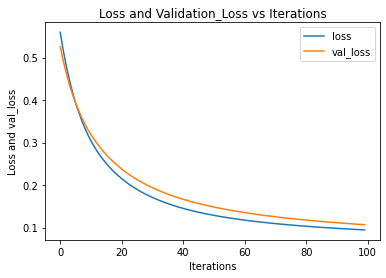

In [ ]:
#Plot whats returned by model.fit()

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.title('Loss and Validation_Loss vs Iterations', loc='center')
plt.ylabel('Loss and val_loss')
plt.xlabel('Iterations')
plt.legend()
plt.show()

**Observation:**
+ There is a steady decrease in the loss per iterations as expected.

+ Sometimes, out of a suddent we may get huge spikes because of overfitting.

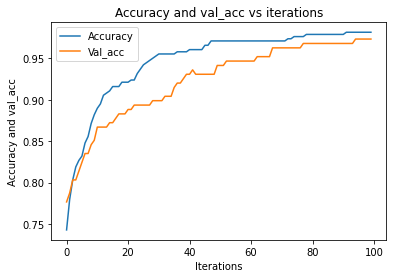

In [ ]:
#Lets try plotting the accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_acc')
plt.title('Accuracy and val_acc vs iterations', loc='center')
plt.ylabel('Accuracy and val_acc')
plt.xlabel('Iterations')
plt.legend()
plt.show()

**Observation:**
+ We see a steady increase at each iteration.

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

#They are the outputs of sigmoid, they are interpreted as probabilities between 0 and 1.

[[4.0330410e-02]
 [9.0424716e-01]
 [9.9108040e-01]
 [9.6985745e-01]
 [9.9684966e-01]
 [9.7935212e-01]
 [9.9234927e-01]
 [9.9135906e-01]
 [9.9949455e-01]
 [9.9984628e-01]
 [6.7572337e-01]
 [8.1231898e-01]
 [9.9955904e-01]
 [5.8239627e-01]
 [5.4764026e-01]
 [7.7188909e-02]
 [9.7305852e-01]
 [6.3925982e-04]
 [1.6588569e-03]
 [3.4347144e-05]
 [3.1387180e-02]
 [3.1050086e-02]
 [9.4181031e-01]
 [9.9096513e-01]
 [8.1113279e-03]
 [9.9601108e-01]
 [9.9957550e-01]
 [9.4295442e-03]
 [9.8779798e-01]
 [5.3760409e-04]
 [9.9926567e-01]
 [1.0732383e-02]
 [7.5270700e-01]
 [2.1440059e-02]
 [9.9985909e-01]
 [3.5522431e-02]
 [9.7316515e-01]
 [2.0736009e-02]
 [9.6742308e-01]
 [3.4768373e-02]
 [3.2136416e-01]
 [9.9949837e-01]
 [3.4355342e-01]
 [9.9859768e-01]
 [5.8471322e-01]
 [5.1823976e-05]
 [9.9996156e-01]
 [9.3410283e-01]
 [9.9394608e-01]
 [9.4121695e-04]
 [7.9001409e-05]
 [8.3743632e-02]
 [6.4377785e-03]
 [9.9245918e-01]
 [9.8194152e-01]
 [9.9691159e-01]
 [9.8928285e-01]
 [9.8053539e-01]
 [9.8295456e-0

In [ ]:
#Round to get the actual predictions
y_pred = np.round((y_pred.flatten()))
print(y_pred)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.]


In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Calculate the accuracy, compare it to evaluate() output

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

97.3404255319149

In [ ]:
print('Manually calculayed accuracy: ', np.mean(y_pred == y_test))
print('Evaluated output: ', model.evaluate(X_test, y_test))

Manually calculayed accuracy:  0.973404255319149
6/6 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9734
Evaluated output:  [0.10668321698904037, 0.9734042286872864]


In [ ]:
#Saving and loading the model
model.save('linear_classifier.h5')

In [ ]:
#Check if the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Apr 29 16:19 linear_classifier.h5
drwxr-xr-x 1 root root 4.0K Apr 25 13:46 sample_data


In [ ]:
skillslash = tf.keras.models.load_model('linear_classifier.h5')
print(skillslash)

In [ ]:
skillslash.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
skillslash.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9734


[0.10668321698904037, 0.9734042286872864]